In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_60= pd.read_csv('df_audio_analysis_60.csv')
df_all= pd.read_csv('df_audio_analysis_sample.csv')

ESTO DE ABAJO ERA PARA CREAR YEARS A PARTIR DE LA FECHA DE PUBLICACION

In [33]:
# Convertir la columna de fecha a tipo datetime
#df_all['release_date'] = pd.to_datetime(df_all['release_date'], errors='coerce')
#df_60['release_date'] = pd.to_datetime(df_all['release_date'], errors='coerce')

#date_formats = ['%Y-%m-%d']  

# Función para intentar diferentes formatos
def parse_dates(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Aplicar la función a la columna
#df_all['release_date'] = df_all['release_date'].apply(parse_dates)
#df_60['release_date'] = df_60['release_date'].apply(parse_dates)

#def parse_years(date_str):
    if pd.to_datetime(date_str, format='%Y', errors='coerce') is not pd.NaT:
        return pd.to_datetime(date_str, format='%Y').replace(month=1, day=1)
    return pd.NaT

# Aplicar la función a la columna
#df_all['release_date'] = df_all['release_date'].apply(lambda x: parse_years(x) if pd.isna(pd.to_datetime(x, errors='coerce')) else pd.to_datetime(x, errors='coerce'))
#df_60['release_date'] = df_60['release_date'].apply(lambda x: parse_years(x) if pd.isna(pd.to_datetime(x, errors='coerce')) else pd.to_datetime(x, errors='coerce'))

#df_all = df_all.dropna(subset=['release_date'])
#df_60 = df_all.dropna(subset=['release_date'])

#df_all['year'] = df_all['release_date'].dt.year
#df_60['year'] = df_60['release_date'].dt.year

In [34]:
#Este es el de los picos que decías que queda mejor por lustros
def plot_media_por_año(df,df2, parametros, year_column='peak_year', figsize=(10,6)):
 
    df_combined = pd.concat([df,df2])

    plt.figure(figsize=figsize)
    
    # Graficar cada parámetro
    for parametro in parametros:
        sns.lineplot(x=year_column, y=parametro, data=df_combined, label=parametro)
    
    # Configurar la gráfica
    plt.title(f'Media de {", ".join(parametros)} por Año', fontsize=16)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Media', fontsize=14)
    plt.legend(title="Parámetros")
    plt.grid(True)
    
    # Mostrar la gráfica
    plt.show()


In [35]:
#gráfico de barras, aquí puedes meter los dos df separados y los combina dentro
def bar_media_por_año_dosdf(df,df2, parametros, year_column='peak_year', figsize=(10,6), grid=True):
 
    df_combined = pd.concat([df,df2])

    plt.figure(figsize=figsize)
    
    # Graficar cada parámetro
    for param in parametros:
        sns.barplot(df_combined, x=df_combined[year_column],y=df_combined[param])
    
    # Configurar la gráfica
    plt.title(f'Media de {", ".join(parametros)} por Año', fontsize=16)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Media', fontsize=14)
    plt.legend(title="Parámetros")
    plt.grid(grid)
    plt.xticks(rotation=45)
    
    # Mostrar la gráfica
    plt.show()

#gráfico de barras para un solo df
def bar_media_por_año(df, parametros, year_column='year', figsize=(10,6), grid=True):

    plt.figure(figsize=figsize)
    
    # Graficar cada parámetro
    for param in parametros:
        sns.barplot(df, x=df[year_column],y=df[param])
    
    # Configurar la gráfica
    plt.title(f'Media de {", ".join(parametros)} por Año', fontsize=16)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel(f'{", ".join(parametros)}', fontsize=14)
    plt.legend(title="Parámetros")
    plt.grid(grid)
    plt.xticks(rotation=45)
    
    # Mostrar la gráfica
    plt.show()


In [36]:
df_combined = pd.concat([df_all,df_60])

df_combined['lustro'] = (df_combined['peak_year'] // 5 * 5).astype(str) + '-' + ((df_combined['peak_year'] // 5 * 5) + 4).astype(str)

# Agrupar por lustro
df_grouped_lustros_popularity = df_combined.groupby('lustro').agg({'sp_popularity': 'mean'}).reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


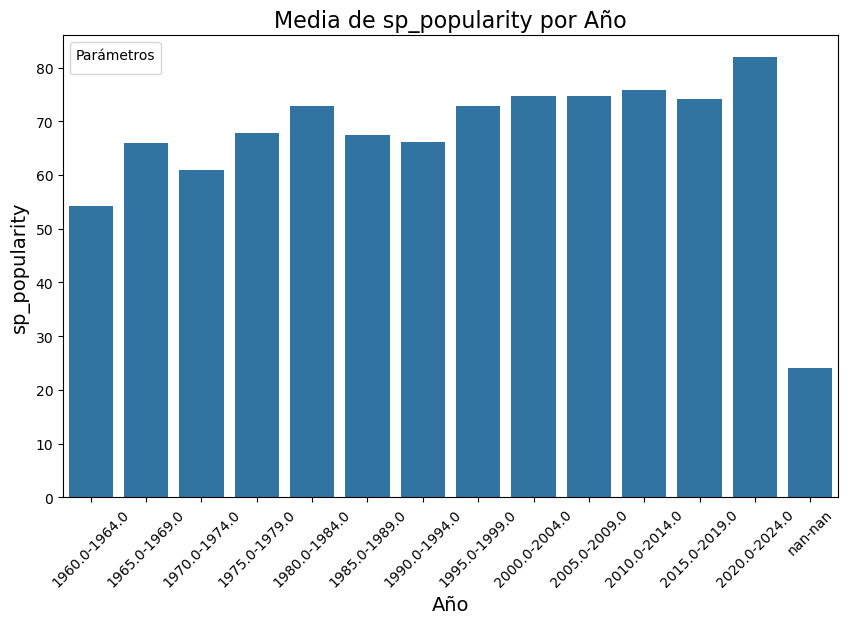

In [37]:
bar_media_por_año(df_grouped_lustros_popularity, parametros=['sp_popularity'], year_column='lustro', figsize=(10,6), grid=False)

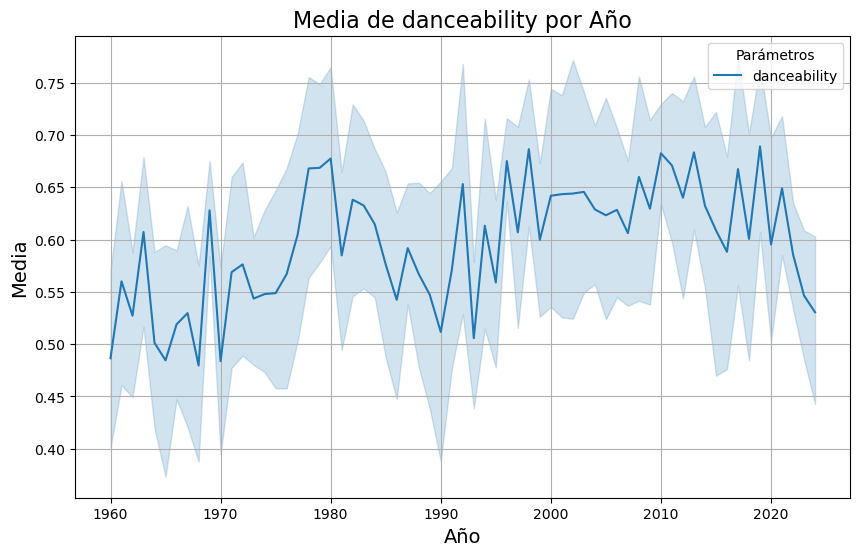

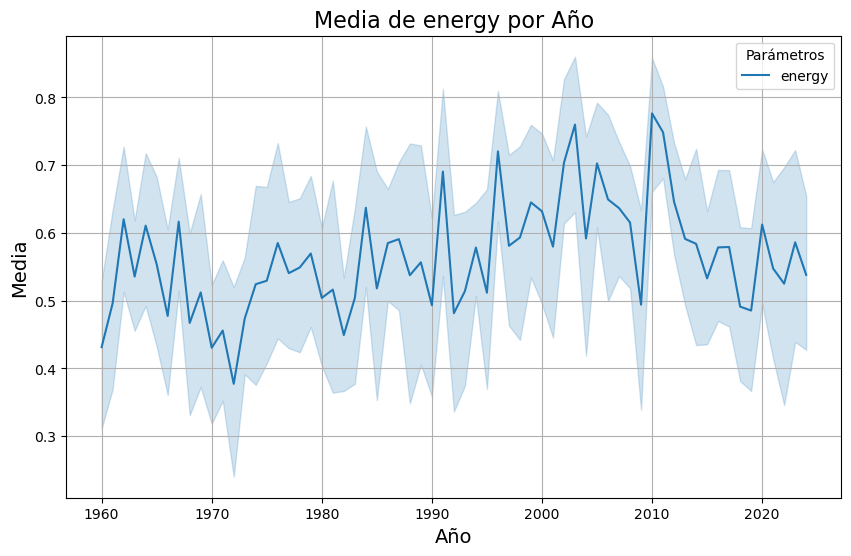

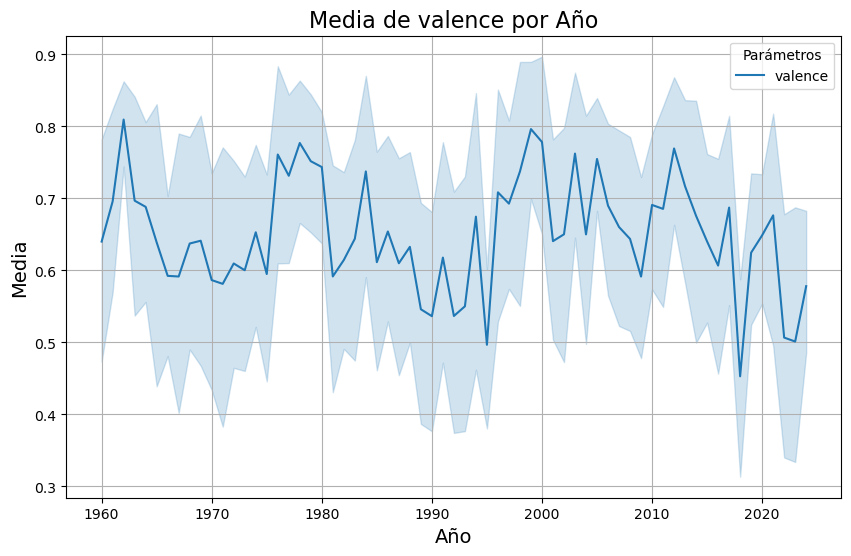

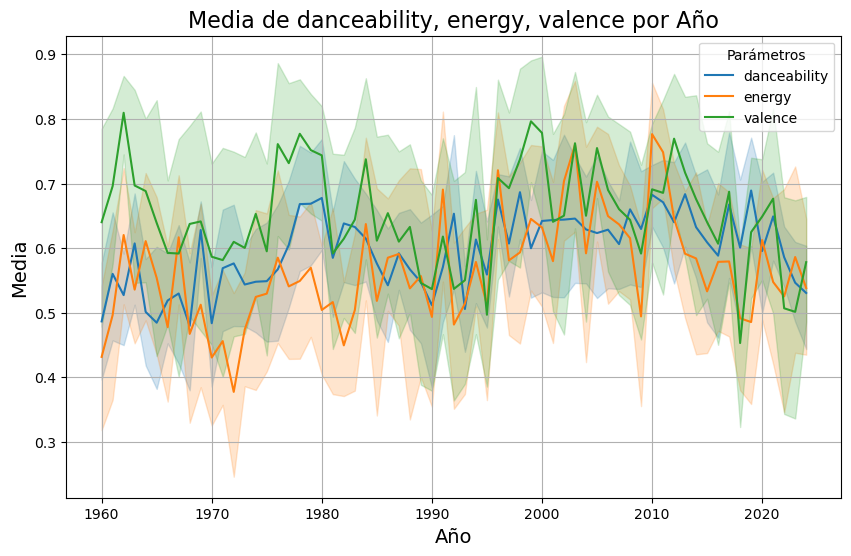

In [38]:
plot_media_por_año(df_all, df_60, parametros=['danceability'])
plot_media_por_año(df_all, df_60, parametros=['energy'])
plot_media_por_año(df_all, df_60, parametros=['valence'])
plot_media_por_año(df_all, df_60, parametros=['danceability','energy','valence'])


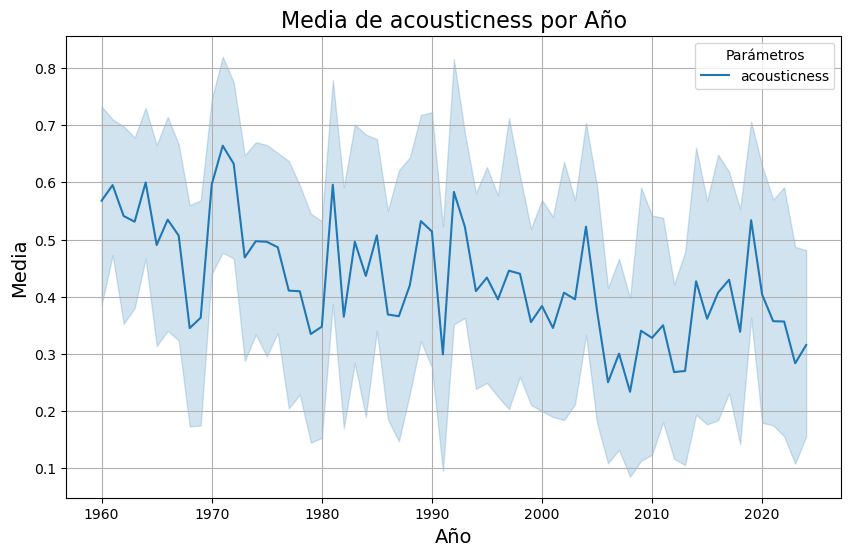

In [39]:
plot_media_por_año(df_all, df_60, parametros=['acousticness'])

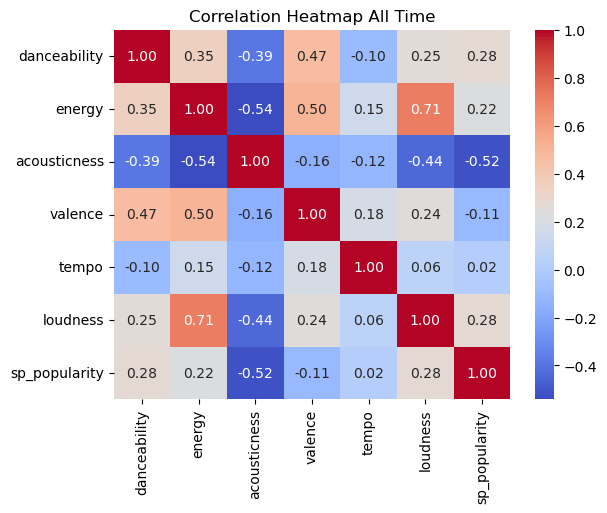

In [40]:
# Calcular la matriz de correlación
corr = df_combined[['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'loudness','sp_popularity']].corr()

# Crear el heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap All Time')
plt.show()

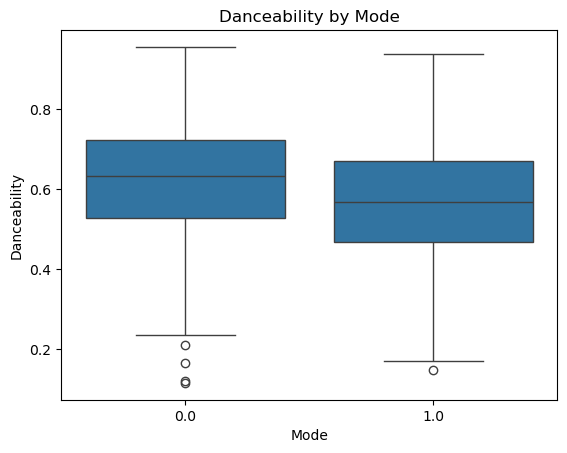

In [41]:
sns.boxplot(x='mode', y='danceability', data=df_combined)
plt.title('Danceability by Mode')
plt.xlabel('Mode')
plt.ylabel('Danceability')
plt.show()

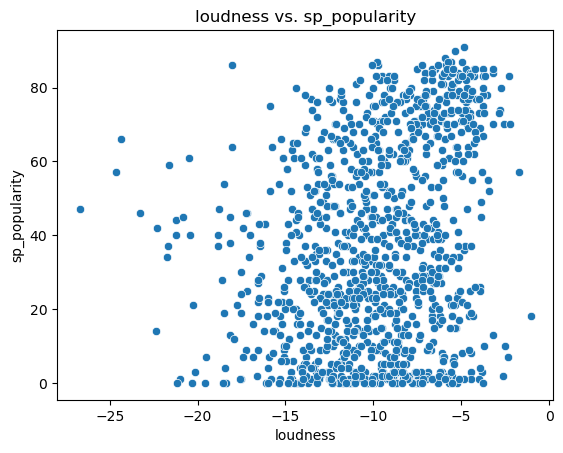

In [42]:
sns.scatterplot(x='loudness', y='sp_popularity', data=df_combined)
plt.title('loudness vs. sp_popularity')
plt.xlabel('loudness')
plt.ylabel('sp_popularity')
plt.show()

In [ ]:
sns.scatterplot(x='loudness', y='sp_popularity', data=df_combined)
plt.title('loudness vs. sp_popularity')
plt.xlabel('loudness')
plt.ylabel('sp_popularity')
plt.show()

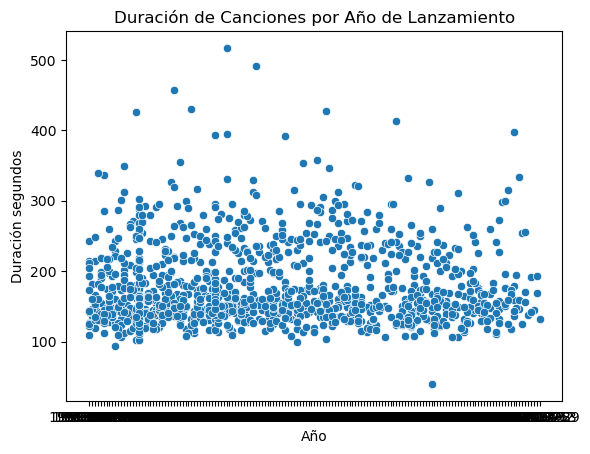

In [66]:

sns.scatterplot(x='peak_date', y='duration', data=df_combined)
plt.title('Duración de Canciones por Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Duración segundos')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


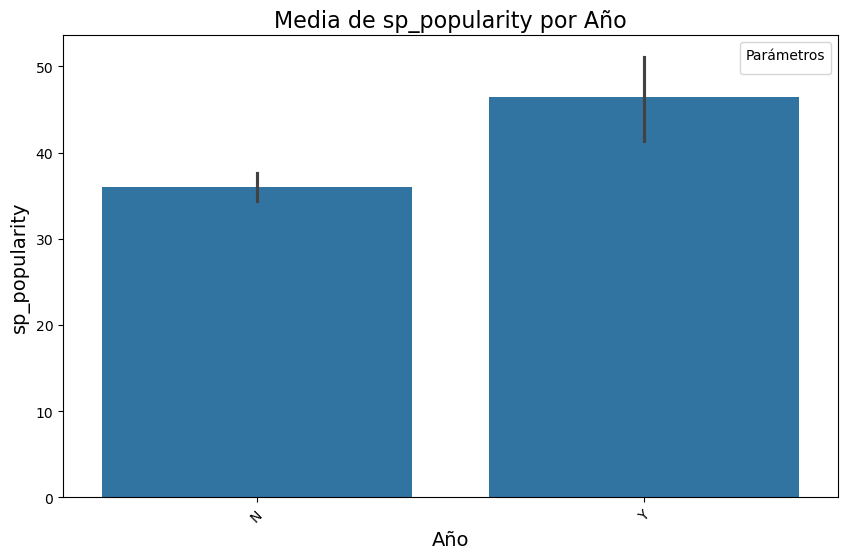

In [63]:

bar_media_por_año(df_combined, ['sp_popularity'], year_column='colab', figsize=(10,6), grid=False)

In [58]:
df_combined.columns

Index(['title_spotify', 'album', 'sp_popularity', 'artist_x', 'colab',
       'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'peak_year', 'title', 'artist_y',
       'artist', 'weeks', 'peak_rank', 'peak_date', 'id', 'lustro'],
      dtype='object')

In [64]:
df_combined['speechiness'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
814     True
815     True
816    False
817     True
818     True
Name: speechiness, Length: 1144, dtype: bool

ValueError: cannot reindex on an axis with duplicate labels

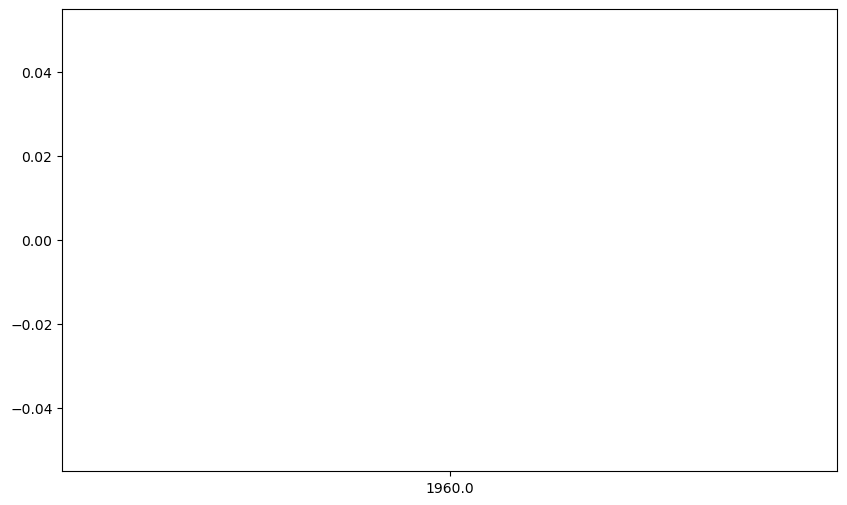

In [61]:

bar_media_por_año(df_combined, parametros=['speechiness','colab'], year_column='peak_year', figsize=(10,6), grid=False)